# 4. Funkce a jejich grafy

SageMath podporuje mnoho způsobů jak vytvářet všemožné typy grafů.
Tato funkcionalita nám umožňuje graficky experimentovat s funkcemi a vizualizovat různé situace (např. testování správnosti řešení nerovností).

V tomto notebooku si ukážeme nástroje, bez kterých se při této činnosti neobejdeme.
Jde o velmi rozsáhlou [oblast](https://doc.sagemath.org/html/en/reference/plotting/index.html).

## 4.1 Funkce `plot`

Nejjednodušším způsobem, jak vizualizovat funkci, je vytvoření odpovídajícího symbolického výrazu s jednou symbolickou proměnnou a použití příkazu `plot`.
Předveďme si tento postup na jednoduchém příkladě.

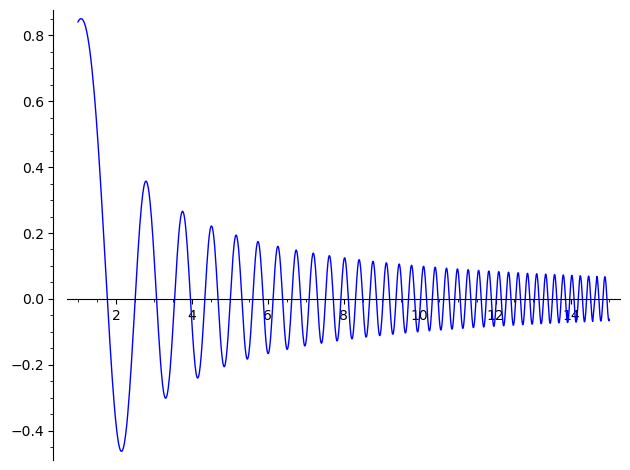

In [1]:
# Buď x symbolická proměnná.
var('x')
# Graf funkce 1/x * \sin(x^2) pro x z intervalu <1, 15>.
plot(1 / x * sin(x^2), (x, 1, 15))

Funkce `plot` si, jak vidíme, poradí s výrazem a rozsahem pro symbolickou proměnnou (zde `x`).
Můžeme jí ale předat přímo i funkci.

In [2]:
f(x) = sin(x) / x
show(f)           # všimněte si rozdílu mezi funkcí
show(f(x))        # a funkční hodnotou.

x |--> sin(x)/x

sin(x)/x

Nyní můžeme vynechat explicitní uvedení nezávisle proměnné.

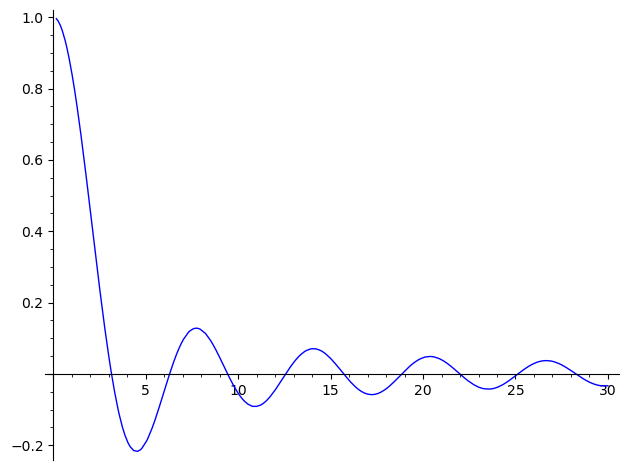

In [3]:
plot(f, (0, 30))

SageMath nám umožňuje vyladit i ostatní parametry grafu.
V následující ukázce si ukážeme několik užitečných parametrů.
Interně SageMath k tvorbě grafů využívá mocnou Pythonovskou knihovnu [matplotlib](https://matplotlib.org).
Doporučuji prozkoumat [dokumentaci funkce `plot`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.plot).

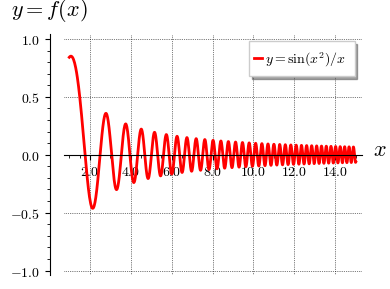

In [4]:
plot(1 / x * sin(x^2), (x, 1, 15),
    ymin = -1, ymax = 1,                  # rozsah svislé osy
    thickness = 2,                        # tloušťka křivky
    rgbcolor = 'red',                     # barva
    axes_labels = ['$x$', '$y=f(x)$'],    # popisky os, lze využívat LaTeX
    tick_formatter = 'latex',             # cejchování os stejným fontem jako popisky os
    legend_label = '$y = \\sin(x^2)/x$',  # legenda (vhodné při kombinování více grafů)
    gridlines = True,                     # automatická mřížka
    figsize = 4)                          # velikost výsledného obrázku

Občas je potřeba přesně specifikovat na kterých místech se mají osy cejchovat (typicky u trigonometrických funkcí).
V následující ukázce grafu funkce arkus sinus si uážeme jak na to.

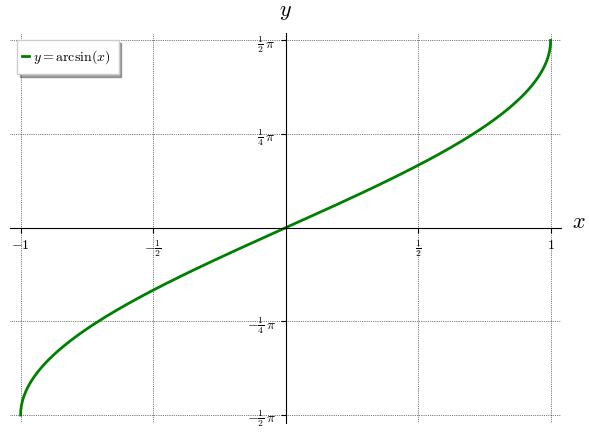

In [5]:
plot(arcsin(x), (x, -1, 1),
    ymin = -pi/2, ymax = pi/2,
    thickness = 2, rgbcolor = 'green',
    axes_labels = ['$x$', '$y$'], tick_formatter = 'latex',
    legend_label = '$y = \\arcsin(x)$',
    ticks = [[-1, -1/2, 1/2, 1],[-pi/2, -pi/4, pi/4, pi/2]], # cejchování os
    gridlines = True,
    figsize = 6)

Funkce plot akceptuje i obyčejnou Pythonovskou funkci, která vrací číselné výsledky.
Syntaxe je jen nepatrně odlišná (neuvádí se nezávisle proměnná).
Následující funkce představuje numerickou aproximaci inverzní funkce k funkci $g(x) = x e^x$, $D_g = \langle -1, +\infty)$, tzv. [Lambertovy funkce](https://dlmf.nist.gov/4.13). Její implementace níže je reklamou na Newtonovu metodu, kterou budeme probírat později během semestru.

In [6]:
def lambert(z):
    """
        Naivní implementace Lambertovy funkce, tedy inverze
        k g(w) = w*exp(w), kde w > -1. Výpočet pomocí Newtonovy
        metody s očekávanou přesností na 5 cifer za desetinnou
        tečkou.
        
        PS: Na takovéto výpočty právě Python není nejlepší volba,
        toto je ale _demonstrační_ notebook, jehož pointa je jinde.
    """

    # Je argument "z" z definičního oboru?
    if z <= -1/e:
        raise ValueError('Argument není v definičním oboru Lambertovy funkce!')

    # Přesnost a iterátor rekurentní posloupnosti.
    eps = 1e-6
    newton = lambda w: w - (w*exp(w) - z) / (exp(w) + w*exp(w))

    # První nástřel.
    if z < 0:
        y1 = -0.5
    elif z > 0:
        y1 = z/2
    else:
        return 0

    # Iterativní výpočet.
    y2 = newton(z)
    while abs(y1 - y2) > eps:
        y1,y2 = y2,newton(y2)

    return y2

A nakonec graf s oběma funkcemi.
Zde také ukazujeme, jak kombinovat více grafických objektů do jednoho.
K tomu slouží operátor `+`.
Různa nastavení grafiky (osy, velikost obrázku, atp.) stačí uvést jednou v prvním grafickém objektu.

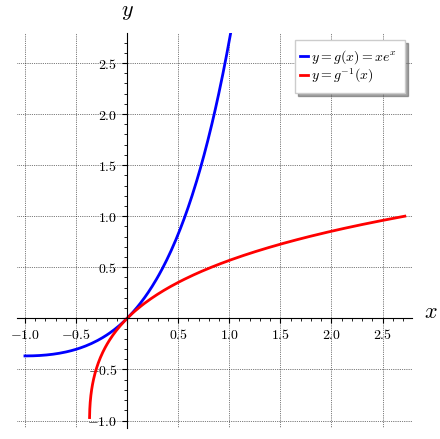

In [7]:
fig1 = plot(x*exp(x), (x, -1, e),
    ymin = -1, ymax = e,
    thickness = 2, rgbcolor = 'blue',
    axes_labels = ['$x$', '$y$'], tick_formatter = 'latex',
    legend_label = '$y = g(x) = x e^x$', gridlines=True,
    figsize = 6, aspect_ratio = 1)

fig2 = plot(lambert, (-1/e, e),
    thickness = 2, rgbcolor = 'red',
    legend_label = '$y = g^{-1}(x)$')

fig1 + fig2

## 4.2 Funkce `scatter_plot`

Nejen v BI-MA1 občas potřebujeme vizualizovat posloupnost $(a_n)_{n=1}^\infty$.
K tomu se výše zmíněná funkce `plot` příliš nehodí.
Diskrétní hodnoty lze snadno zobrazovat pomocí [funkce `scatter_plot`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/scatter_plot.html#sage.plot.scatter_plot.scatter_plot).
Vezměme například posloupnost s členy $a_n = \sin\left(\frac{\pi n}{4}\right)$, $n \in \mathbb{N}$.

In [8]:
a(n) = sin(pi * n / 4)

show(a)

n |--> sin(1/4*pi*n)

V tento moment SageMath o "diskrétnosti" proměnné `n` nic neví, my ovšem ano.
Graf této posloupnosti, tedy množinu bodů tvaru $(n, a_n)$, $n\in\mathbb{N}$, můžeme vizualizovat ve dvou krocích: napočteme odpovídající hodnoty posloupnosti a zobrazíme je pomocí funkce `scatter_plot`.

Nejprve vytvoříme list s požadovanými prvky (a zobrazíme si první čtyři):

In [9]:
points = [(n, a(n)) for n in range(1, 20)]

show(points[0:4])

[(1, 1/2*sqrt(2)), (2, 1), (3, 1/2*sqrt(2)), (4, 0)]

A poté body v tomto listu vizualizujeme pomocí `scatter_plot`.

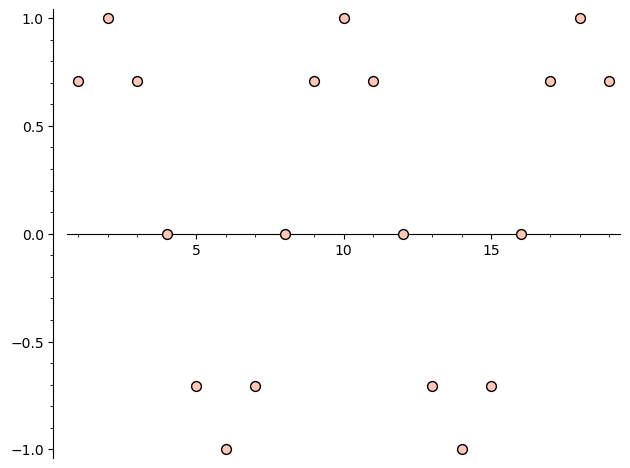

In [10]:
scatter_plot(points)

Parametry grafu můžeme kontrolovat analogickým způsobem jako u `plot`.

## 4.3 Grafy funkcí dvou proměnných

V BI-MA2 budeme pracovat s funkcemi více proměnných.
Pokud se budeme bavit o dvou proměnných, pak je poměrně snadné takové funkce vizualizovat, jejich graf je nyní plocha v trojrozměrném prostoru.
V následujících buňkách nejprve definujeme druhou symbolickou proměnnou $y$ a poté vykreslíme graf funkce $f(x, y) = \sin(x)\sin(y) / \sqrt{x^2 + y^2}$.

In [11]:
var('y')

y

In [12]:
plot3d(sin(4*x) * sin(3*y) / sqrt(x^2 + y^2), (x, -5, 5), (y, -5, 5), plot_points=100)

Graphics3d Object